<a href="https://colab.research.google.com/github/szh141/UVA-AMF/blob/main/FT_synthesis_of_2D_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://myuva-my.sharepoint.com/:w:/r/personal/pfa2xb_virginia_edu/_layouts/15/Doc.aspx?sourcedoc=%7BEE44805F-FB89-4B46-878D-3459F45ACE11%7D&file=2D%20Fourier%20synthesis%20of%20an%20image.docx&action=default&mobileredirect=true&wdsle=0


1D FT good intro material before 2D FT

https://myuva-my.sharepoint.com/:w:/r/personal/pfa2xb_virginia_edu/_layouts/15/Doc.aspx?sourcedoc=%7B193A1586-EAFA-4113-A0AA-F2428635B8D1%7D&file=Fourier%20Transform.docx&action=default&mobileredirect=true

(301, 301, 4)


(-0.5, 300.5, 300.5, -0.5)

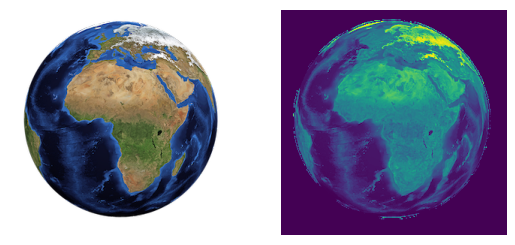

In [1]:
from skimage import io,color
import matplotlib.pyplot as plt

image_filename = "/content/drive/MyDrive/Colab images/Data/Earth.png"
# odd row and column
# enough margin with no pattern

img = io.imread(image_filename)
print(img.shape)   #odd number column and row
image = img[:,:,1]

plt.subplot(121)
plt.imshow(img)
plt.axis("off")
plt.subplot(122)
plt.imshow(image)
plt.axis("off")

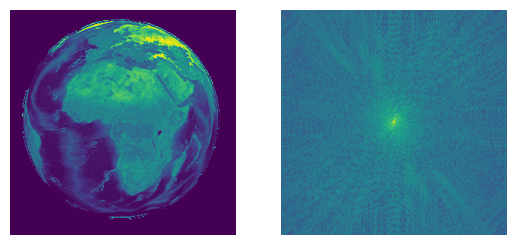

In [2]:
import numpy as np

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

# numpy image origina is top left, row is X, and column is Y
# np.fft.fft2 definition is different than numpy image
# FT center is not the origin
# ifftshift to prepare for DFT
# after DFT, use fftshift to prepare it for intuitive visualization

ft = calculate_2dft(image)
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))  # magnitude of Real and Imaginary Fourier coefficients
plt.axis("off")
plt.show()

Reverse engineering the gratings

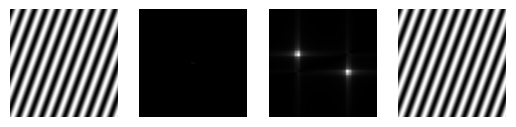

In [3]:
# generate the grating
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 100
angle = np.pi/9
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)
plt.set_cmap("gray")
plt.subplot(141)
plt.imshow(grating)
plt.axis("off")

# in PUMA FT intro, np.sin(2*np.pi*f*k/N)
# f = 1/wavelength
# k is the discrete spatial point
# angle is unique in 2D FT synthesis


# Calculate the Fourier transform of the grating
ft = calculate_2dft(grating)
plt.subplot(142)
plt.imshow(abs(ft))
plt.axis("off")
#plt.xlim([480, 520])
#plt.ylim([520, 480])

plt.subplot(143)
plt.imshow(abs(ft))
plt.axis("off")
plt.xlim([480, 520]) # around the FT centre
plt.ylim([520, 480])

# Calculate the inverse Fourier transform of
# the Fourier transform
ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)
ift = ift.real  # Take only the real part
plt.subplot(144)
plt.imshow(ift)
plt.axis("off")
plt.show()

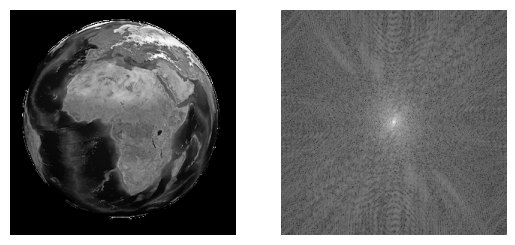

In [4]:

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)
def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

ft = calculate_2dft(image)
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.show()

You also define coords_left_half. This generator yields pairs of coordinates that cover the entire left-hand half of the array. It also includes the central column, which contains the centre pixel. Since points come in pairs that are symmetrical around the centre point in a Fourier transform, you only need to go through coordinates in one half of the array. You can then pair each point with its counterpart on the other side of the array.

FT image center starts from the origin

so, left half is (x, y) for x in range(array_size) for y in range(centre+1)

In [5]:
array_size = len(image) # 2D take the long axis? that's why need square image
# this is also the FT image size

centre = int((array_size - 1) / 2) # odd number

# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)

coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre+1)
)
# this is all rows, and half of the column including the centre

The function calculate_distance_from_centre() takes a pair of coordinates and the index of the centre pixel as arguments and works out the distance of the point from the centre.

You use this function as the key for sorted(), which redefines the generator coords_left_half so that the points are in ascending order of distance from the centre. Therefore, the points represent increasing frequencies of the sinusoidal gratings.

In [6]:
def calculate_distance_from_centre(coords, centre):
    # Distance from centre is √(x^2 + y^2)
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )

# Sort points based on distance from centre
coords_left_half = sorted(
    coords_left_half,
    key=lambda x: calculate_distance_from_centre(x, centre)
)

Finding The Second Symmetrical Point in Each Pair

In [7]:
def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))

In [16]:
len(coords_left_half)

# image.shape is 301x301
# total pixel is 301x301
# take out the middle cross line 301+301-1
# 301x301-(301+301-1)
# divide by two, take half
# then add the centre line 301
# then add the horizontal line (301-1)/2

45451

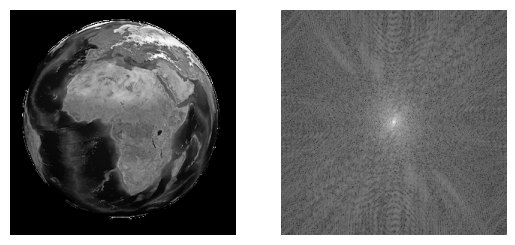

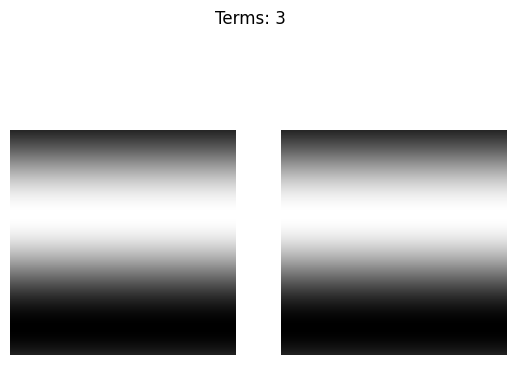

In [15]:
# manually display a few grating plots

def display_plots(individual_grating, reconstruction, idx):
    plt.subplot(121)
    plt.imshow(individual_grating)
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(reconstruction)
    plt.axis("off")
    plt.suptitle(f"Terms: {idx}")
    #plt.pause(0.01)

ft = calculate_2dft(image)
# Show grayscale image and its Fourier transform
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.pause(2)

# Reconstruct image
fig = plt.figure()
# Step 1
# Set up empty arrays for final image and
# individual gratings
rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype="complex"
)

# dtype='complex' for individual grating

# max_choice = len(coords_left_half)
choice = 3 # any number except 0 works
# component 0 is the centre, DC components of uniform background
coords = coords_left_half[choice]
symm_coords = find_symmetric_coordinates(
            coords, centre
        )

individual_grating[coords] = ft[coords]
individual_grating[symm_coords] = ft[symm_coords]

rec_grating = calculate_2dift(individual_grating)
rec_image += rec_grating

display_plots(rec_grating, rec_image, choice)
plt.show()


In [ ]:
def display_plots(individual_grating, reconstruction, idx):
    plt.subplot(121)
    plt.imshow(individual_grating)
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(reconstruction)
    plt.axis("off")
    plt.suptitle(f"Terms: {idx}")
    plt.pause(0.01)

ft = calculate_2dft(image)
# Show grayscale image and its Fourier transform
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.pause(2)
# Reconstruct image
fig = plt.figure()
# Step 1
# Set up empty arrays for final image and
# individual gratings
rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype="complex"
)
idx = 0
# Step 2
for coords in coords_left_half:
    # Central column: only include if points in top half of
    # the central column
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(
            coords, centre
        )
        # Step 3
        # Copy values from Fourier transform into
        # individual_grating for the pair of points in
        # current iteration
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]
        # Step 4
        # Calculate inverse Fourier transform to give the
        # reconstructed grating. Add this reconstructed
        # grating to the reconstructed image
        rec_grating = calculate_2dift(individual_grating)
        rec_image += rec_grating
        # Clear individual_grating array, ready for
        # next iteration
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0
        display_plots(rec_grating, rec_image, idx)
    plt.show()